<a href="https://colab.research.google.com/github/SirSeriki/Titanic-Passenger-Analysis/blob/main/titanic_passenger_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Titanic Passenger Analysis**
# **Objective**
The overall objective is to prove the hypothesis that low income passengers suffered the most losses on the ill-fated Titanic on its maiden voyage in 1912. 

# **Data**
The data for this project was obtained from [titanic data](https://github.com/rashida048/Datasets/blob/master/titanic_data.csv) a dataset in the public domain under CC0. The dataset consists of passengers information such as 'Passengerid', 'Survived', 'Age' and 'Pclass'. 

# **Approach**
The first approach was to determine the sex 'Sex'of the passengers and grouped them by Passenger class 'Pclass', next we determined the number of passengers for every passenger class 1 being 'First Class' 2 being 'Business Class' and 3 'Economy Class'. Armed with the outcome we proceeded to determine the number of survivors and deaths for each passenger class. We then determined the age group of the passengers to point out the survival rate for each age group.

**Installing the packages**

In [ ]:
install.packages("plyr")
install.packages("tidyverse")
install.packages("here")
install.packages("skimr")
install.packages("janitor")
install.packages("ggplot2")


**Installing the libraries**

In [ ]:
library(tidyverse)
library(lubridate)
library(ggplot)
library(plyr)
library(dplyr)
library(here)
library(skimr)
library(janitor)
library(readr)
library(tidyr)
library(maps)
library(ggmap)
library(ggthemes)

ERROR: Error in library(ggplot): there is no package called ‘ggplot’


**Collect data**

In [ ]:
titanic <- read.csv("../input/titanic-data/titanic_data_V2.csv")

**Inspecting the data**

In [ ]:
colnames(titanic)
glimpse(titanic)
str((titanic))
head(titanic)
dim(titanic)
nrow(titanic)
summary(titanic)

## Summary of the fare
summary(titanic$Fare)

[1] "PassengerId" "Survived"    "Pclass"      "Name"        "Sex"        
 [6] "Age"         "SibSp"       "Parch"       "Ticket"      "Fare"       
[11] "Cabin"       "Embarked"    "Age.Group"

Rows: 891
Columns: 13
$ PassengerId <int> 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17,…
$ Survived    <int> 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1…
$ Pclass      <int> 3, 1, 3, 1, 3, 3, 1, 3, 3, 2, 3, 1, 3, 3, 3, 2, 3, 2, 3, 3…
$ Name        <chr> "Braund, Mr. Owen Harris", "Cumings, Mrs. John Bradley (Fl…
$ Sex         <chr> "male", "female", "female", "female", "male", "male", "mal…
$ Age         <dbl> 22, 38, 26, 35, 35, NA, 54, 2, 27, 14, 4, 58, 20, 39, 14, …
$ SibSp       <int> 1, 1, 0, 1, 0, 0, 0, 3, 0, 1, 1, 0, 0, 1, 0, 0, 4, 0, 1, 0…
$ Parch       <int> 0, 0, 0, 0, 0, 0, 0, 1, 2, 0, 1, 0, 0, 5, 0, 0, 1, 0, 0, 0…
$ Ticket      <chr> "A/5 21171", "PC 17599", "STON/O2. 3101282", "113803", "37…
$ Fare        <dbl> 7.2500, 71.2833, 7.9250, 53.1000, 8.0500, 8.4583, 51.8625,…
$ Cabin       <chr> "", "C85", "", "C123", "", "", "E46", "", "", "", "G6", "C…
$ Embarked    <chr> "S", "C", "S", "S", "S", "Q", "S", "S", "S", "C", "S", "S"…
$ Age.Group   <chr

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age.Group
,<int>,<int>,<int>,<chr>,<chr>,<dbl>,<int>,<int>,<chr>,<dbl>,<chr>,<chr>,<chr>
1,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,,S,Adult
2,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38,1,0,PC 17599,71.2833,C85,C,Adult
3,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,,S,Adult
4,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S,Adult
5,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,,S,Adult
6,6,0,3,"Moran, Mr. James",male,NA,0,0,330877,8.4583,,Q,


[1] 891  13

[1] 891

  PassengerId       Survived          Pclass          Name          
 Min.   :  1.0   Min.   :0.0000   Min.   :1.000   Length:891        
 1st Qu.:223.5   1st Qu.:0.0000   1st Qu.:2.000   Class :character  
 Median :446.0   Median :0.0000   Median :3.000   Mode  :character  
 Mean   :446.0   Mean   :0.3838   Mean   :2.309                     
 3rd Qu.:668.5   3rd Qu.:1.0000   3rd Qu.:3.000                     
 Max.   :891.0   Max.   :1.0000   Max.   :3.000                     
                                                                    
     Sex                 Age            SibSp           Parch       
 Length:891         Min.   : 0.42   Min.   :0.000   Min.   :0.0000  
 Class :character   1st Qu.:20.25   1st Qu.:0.000   1st Qu.:0.0000  
 Mode  :character   Median :28.00   Median :0.000   Median :0.0000  
                    Mean   :29.71   Mean   :0.523   Mean   :0.3816  
                    3rd Qu.:38.00   3rd Qu.:1.000   3rd Qu.:0.0000  
                    Max.   :80.00 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   0.00    7.91   14.45   32.20   31.00  512.33 

**Dropping the 'Cabin' as it contain too little data and won't be necessary for this analysis**

In [ ]:
titanic <- titanic %>%  
  select(-c( Cabin))

**Dropping the NA values in the Age column so as to make visualization better**

In [ ]:
na.omit(titanic$Age)

[1] 22.00 38.00 26.00 35.00 35.00 54.00  2.00 27.00 14.00  4.00 58.00 20.00
 [13] 39.00 14.00 55.00  2.00 31.00 35.00 34.00 15.00 28.00  8.00 38.00 19.00
 [25] 40.00 66.00 28.00 42.00 21.00 18.00 14.00 40.00 27.00  3.00 19.00 18.00
 [37]  7.00 21.00 49.00 29.00 65.00 21.00 28.50  5.00 11.00 22.00 38.00 45.00
 [49]  4.00 29.00 19.00 17.00 26.00 32.00 16.00 21.00 26.00 32.00 25.00  0.83
 [61] 30.00 22.00 29.00 28.00 17.00 33.00 16.00 23.00 24.00 29.00 20.00 46.00
 [73] 26.00 59.00 71.00 23.00 34.00 34.00 28.00 21.00 33.00 37.00 28.00 21.00
 [85] 38.00 47.00 15.00 22.00 20.00 17.00 21.00 71.00 29.00 24.00  2.00 21.00
 [97] 33.00 33.00 54.00 12.00 24.00 45.00 33.00 20.00 47.00 29.00 25.00 23.00
[109] 19.00 37.00 16.00 24.00 22.00 24.00 19.00 18.00 19.00 27.00  9.00 37.00
[121] 42.00 51.00 22.00 56.00 41.00 51.00 16.00 30.00 44.00 40.00 26.00 17.00
[133]  1.00  9.00 45.00 28.00 61.00  4.00  1.00 21.00 56.00 18.00 50.00 30.00
[145] 36.00  9.00  1.00  4.00 45.00 40.00 36.00 32.00 19.00 19.00  3.00 44.00
[157] 58.00 42.00 24.00 28.00 34.00 46.00 18.00  2.00 32.00 26.00 16.00 40.00
[169] 24.00 35.00 22.00 30.00 31.00 27.00 42.00 32.00 30.00 16.00 27.00 51.00
[181] 38.00 22.00 19.00 21.00 18.00 35.00 29.00 59.00  5.00 24.00 44.00  8.00
[193] 19.00 33.00 29.00 22.00 30.00 44.00 25.00 24.00 37.00 54.00 29.00 62.00
[205] 30.00 41.00 29.00 30.00 35.00 50.00  3.00 52.00 40.00 36.00 16.00 25.00
[217] 58.00 35.00 25.00 41.00 37.00 63.00 45.00  7.00 35.00 65.00 28.00 16.00
[229] 19.00 33.00 30.00 22.00 42.00 22.00 26.00 19.00 36.00 24.00 24.00 24.00
[241]  2.00 50.00 19.00  0.92 17.00 30.00 30.00 24.00 18.00 26.00 28.00 43.00
[253] 26.00 24.00 54.00 31.00 40.00 22.00 27.00 30.00 22.00 36.00 61.00 36.00
[265] 31.00 16.00 46.00 38.00 16.00 29.00 41.00 45.00 45.00  2.00 24.00 28.00
[277] 25.00 36.00 24.00 40.00  3.00 42.00 23.00 15.00 25.00 28.00 22.00 38.00
[289] 40.00 29.00 45.00 35.00 30.00 60.00 24.00 25.00 18.00 19.00 22.00  3.00
[301] 22.00 27.00 20.00 19.00 42.00  1.00 32.00 35.00 18.00  1.00 36.00 17.00
[313] 36.00 21.00 28.00 23.00 24.00 22.00 31.00 46.00 23.00 28.00 39.00 26.00
[325] 21.00 28.00 20.00 34.00 51.00  3.00 21.00 33.00 44.00 34.00 18.00 30.00
[337] 10.00 21.00 29.00 28.00 18.00 28.00 19.00 32.00 28.00 42.00 17.00 50.00
[349] 14.00 21.00 24.00 64.00 31.00 45.00 20.00 25.00 28.00  4.00 13.00 34.00
[361]  5.00 52.00 36.00 30.00 49.00 29.00 65.00 50.00 48.00 34.00 47.00 48.00
[373] 38.00 56.00  0.75 38.00 33.00 23.00 22.00 34.00 29.00 22.00  2.00  9.00
[385] 50.00 63.00 25.00 35.00 58.00 30.00  9.00 21.00 55.00 71.00 21.00 54.00
[397] 25.00 24.00 17.00 21.00 37.00 16.00 18.00 33.00 28.00 26.00 29.00 36.00
[409] 54.00 24.00 47.00 34.00 36.00 32.00 30.00 22.00 44.00 41.00 50.00 39.00
[421] 23.00  2.00 17.00 30.00  7.00 45.00 30.00 22.00 36.00  9.00 11.00 32.00
[433] 50.00 64.00 19.00 33.00  8.00 17.00 27.00 22.00 22.00 62.00 48.00 39.00
[445] 36.00 40.00 28.00 24.00 19.00 29.00 32.00 62.00 53.00 36.00 16.00 19.00
[457] 34.00 39.00 32.00 25.00 39.00 54.00 36.00 18.00 47.00 60.00 22.00 35.00
[469] 52.00 47.00 37.00 36.00 49.00 49.00 24.00 44.00 35.00 36.00 30.00 27.00
[481] 22.00 40.00 39.00 35.00 24.00 34.00 26.00  4.00 26.00 27.00 42.00 20.00
[493] 21.00 21.00 61.00 57.00 21.00 26.00 80.00 51.00 32.00  9.00 28.00 32.00
[505] 31.00 41.00 20.00 24.00  2.00  0.75 48.00 19.00 56.00 23.00 18.00 21.00
[517] 18.00 24.00 32.00 23.00 58.00 50.00 40.00 47.00 36.00 20.00 32.00 25.00
[529] 43.00 40.00 31.00 70.00 31.00 18.00 24.50 18.00 43.00 36.00 27.00 20.00
[541] 14.00 60.00 25.00 14.00 19.00 18.00 15.00 31.00  4.00 25.00 60.00 52.00
[553] 44.00 49.00 42.00 18.00 35.00 18.00 25.00 26.00 39.00 45.00 42.00 22.00
[565] 24.00 48.00 29.00 52.00 19.00 38.00 27.00 33.00  6.00 17.00 34.00 50.00
[577] 27.00 20.00 30.00 25.00 25.00 29.00 11.00 23.00 23.00 29.00 48.00 35.00
[589] 36.00 21.00 24.00 31.00 70.00 16.00 30.00 19.00 31.00  4.00  6.00 33.00
[601] 23.00 48.00  0.67 28.00 18.00 34.00 33.00 41.00 20.00 36.00 16.00 51.00
[613] 31.00 32.00 24.00 

**Changing to the 'Survived', 'Pclass', 'Sex', 'Embarked' columns to factors to make the analysis easier**

In [ ]:
sapply(titanic, class)
SurvivalRate <- as.factor(titanic$Survived)
Passengerclass <- as.factor(titanic$Pclass)
Sex <- as.factor(titanic$Sex)
CityEmbarked <- (titanic$Embarked)

PassengerId    Survived      Pclass        Name         Sex         Age 
  "integer"   "integer"   "integer" "character" "character"   "numeric" 
      SibSp       Parch      Ticket        Fare    Embarked   Age.Group 
  "integer"   "integer" "character"   "numeric" "character" "character"

# **Visualization**

**Passengers sex by Passenger Class**

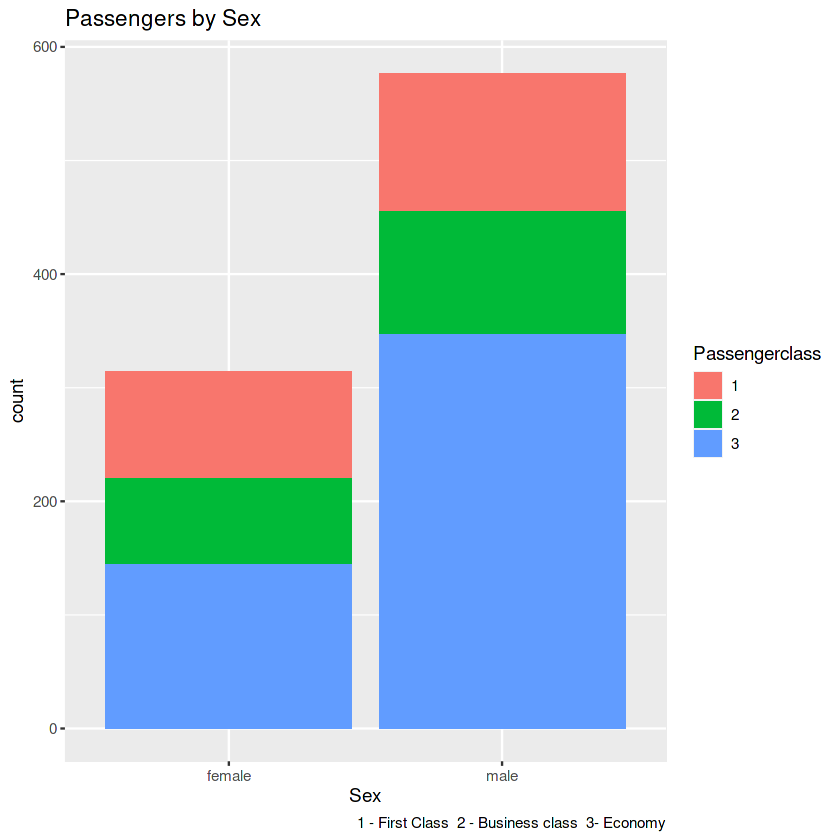

In [ ]:
titanic %>% 
  ggplot()+
  geom_bar(aes(Sex, fill =Passengerclass))+
   labs(title = "Passengers by Sex", caption = "1 - First Class  2 - Business class  3- Economy")

 ## There were more male passengers on-board. Almost double the number of female passengers. Most of the male passengers consisting of the economy passenger class.


**Passengers by Passenger class**

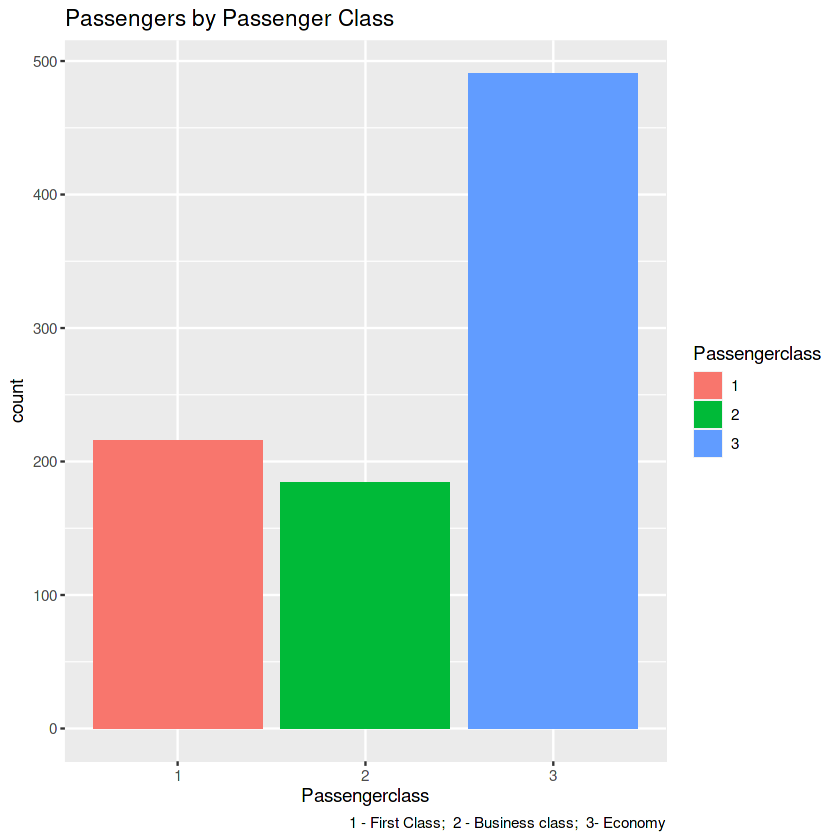

In [ ]:
titanic %>% 
  ggplot()+
  geom_bar(aes(x= Passengerclass, fill = Passengerclass))+
  labs(title = "Passengers by Passenger Class", caption = "1 - First Class;  2 - Business class;  3- Economy")
 ## A bulk of the passengers on-board were in economy class. Considering the price difference between the fare for First Class and Economy, its safe to say economy class consisted of the lower class.


**Survival rate by Passenger Class**

ERROR: Error in UseMethod("count"): no applicable method for 'count' applied to an object of class "c('integer', 'numeric')"


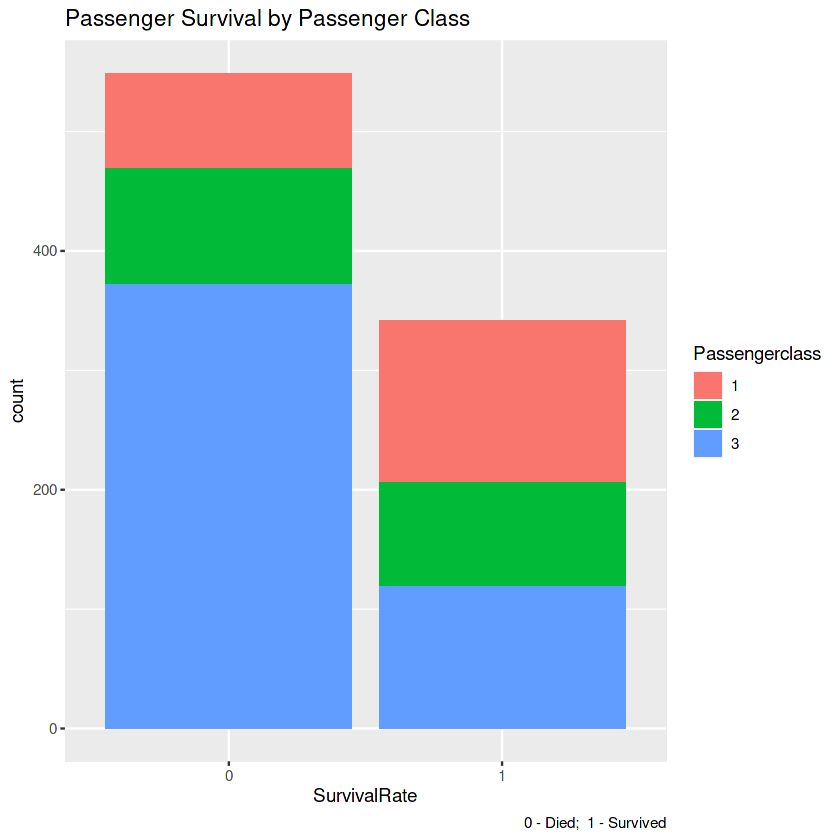

In [ ]:
titanic %>% 
  ggplot()+
  geom_bar(aes(x= SurvivalRate, fill = Passengerclass))+
  labs(title = "Passenger Survival by Passenger Class", caption = "0 - Died;  1 - Survived")

count(titanic$Survived) #Confirming the exact number passengers for each factor 

  ## A total of 549 passengers died, while 342 survived. With the largest percentage of deaths consisting of passengers in economy class. This confirms my hypothesis that low income passengers suffered the most loss on the Titanic.


**Histogram of Passenger Age by Passenger Class**

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

Warning message:
“Removed 177 rows containing non-finite values (stat_bin).”


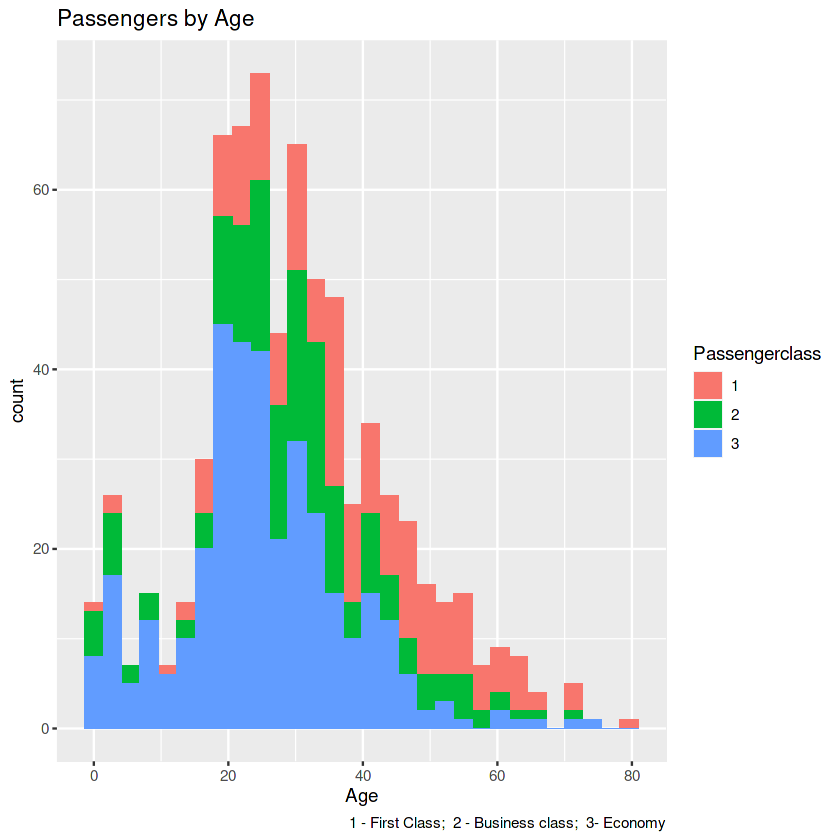

In [ ]:
titanic %>% 
  ggplot()+
  geom_histogram(aes(x = Age, fill = Passengerclass))+
  labs(title = "Passengers by Age", caption = "1 - First Class;  2 - Business class;  3- Economy")


**Cities Passengers embarked from**

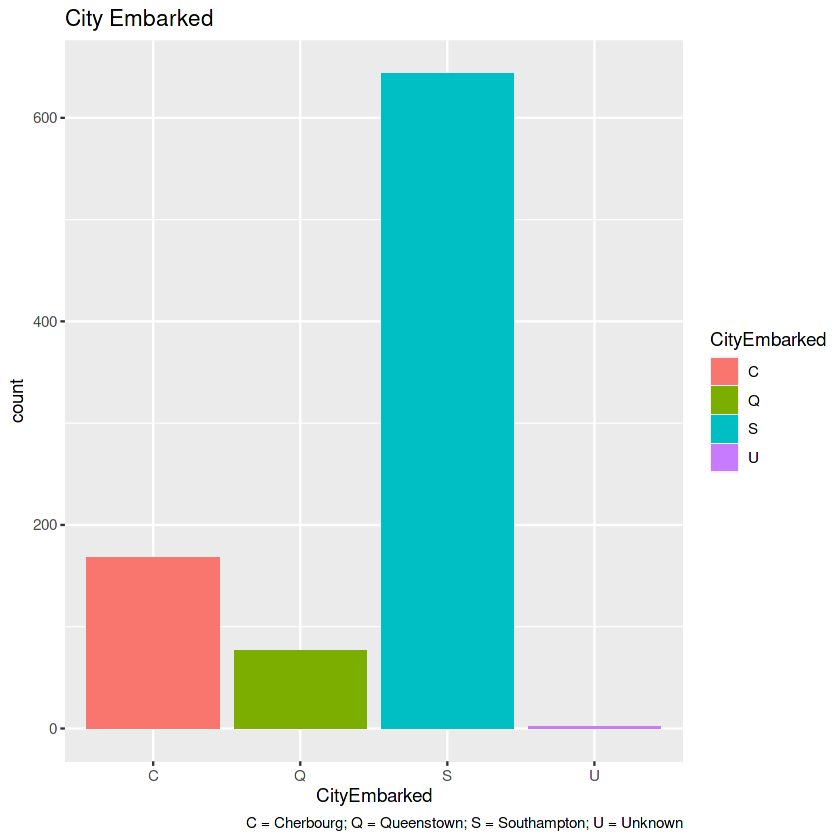

In [ ]:
titanic %>% 
  ggplot()+
  geom_bar(aes(x = CityEmbarked, fill =CityEmbarked))+
  labs(title = "City Embarked", caption = "C = Cherbourg; Q = Queenstown; S = Southampton; U = Unknown")

## Most of the passengers embarked the Titanic in Southampton, with the city of Cherbourg coming in 2nd and Queenstown at 3rd. 
 


# **Key Takeways**
1. There were more male passengers on-board. Almost double the number of female passengers. Most of the male passengers consisting of the economy passenger class.

2. A bulk of the passengers on-board were in economy class. Considering the price difference between the fare for First Class and Economy, its safe to say economy class consisted of the lower class.

3. A total of 549 passengers died, while 342 survived. With the largest percentage of deaths consisting of passengers in economy class. This confirms my hypothesis that low income passengers suffered the most loss on the Titanic.

4. Most of the passengers were between the age of 20-35 and where passengers of the economy class. A passenger class that suffered the most deaths, further proving the hypothesis that sinking of the Titanic was most catastrophic for the lower income young men.

5. Most of the passengers embarked the Titanic in Southampton, with the city of Cherbourg coming in 2nd and Queenstown at 3rd. 
  
# **Conclusion**  
 
 According to Britannica "the Titanic was one of the largest and most opulent ships in the world". In the analysis above the objective was to prove that low income passengers suffered the most losses when the ill-fated Titanic sank during its maiden voyage. Over 50% of the deaths consisted of the passengers in economy class, a total of 549 deaths. A majority of the passangers where between the ages of 20-35 and were mostly young males, possible immigrants headed to America with hopes of a better life.  




  
